In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics


import string
from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('/content/spam.csv', encoding='latin-1')

In [ ]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

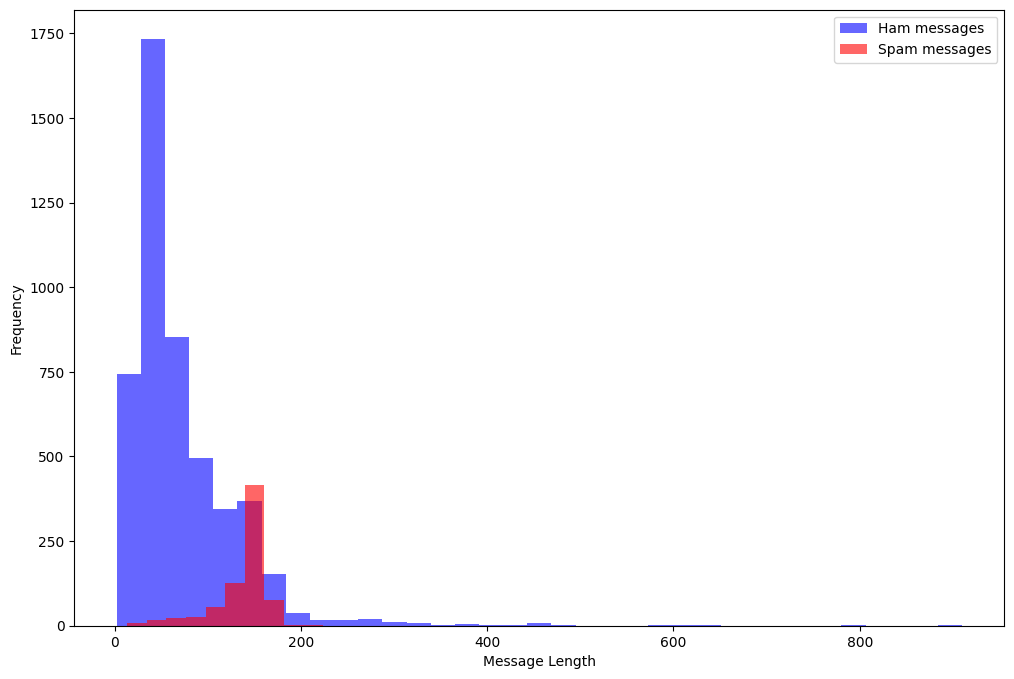

In [ ]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
df[df.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [ ]:
df[df.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [ ]:
df[df.message_len == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    #punctuation checking
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)

    # Removing Stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['clean_msg'] = df.message.apply(text_process)
df.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [ ]:
words = df[df.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(70))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94), ('give', 92), ('say', 91), ('already', 89), ('right', 89), ('make', 88), ('ask', 88), ('said', 86), ('really', 85), ('yeah', 85), ('amp', 82), ('tomorrow', 80), ('phone', 80), ('didnt', 79), ('e', 78), ('morning', 77), ('please', 76), ('cos', 76), ('life', 74), ('ive', 73), 

In [ ]:
words = df[df.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(70))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29), ('want', 29), ('video', 29), ('po', 29), ('tcs', 29), ('award', 28), ('å£150', 27), ('msg', 27), ('chance', 27), ('entry', 26), ('ringtone', 26), ('orange', 26), ('1st', 26), ('collection', 26), ('network', 25), ('selected', 25), ('know', 25), ('50

In [ ]:
X = df.clean_msg
y = df.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
vect = CountVectorizer()
vect.fit(X_train)

# learning the training data and then converting it into the document term matrix(dtm)
# X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)

#examining and verify that correctly transformed or not
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 7996)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7996)


FEATURE EXTRACTION

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [ ]:
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

CPU times: user 4.14 ms, sys: 2.04 ms, total: 6.17 ms
Wall time: 5.78 ms
=======Accuracy Score===========
0.9827709978463748
=======Confision Matrix===========
[[1205    8]
 [  16  164]]


LOGISITIC REGRESSION CLASSIFIER

In [ ]:
model = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time model.fit(X_train_dtm, y_train)

y_pred_class = model.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = model.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

CPU times: user 21.9 ms, sys: 1.39 ms, total: 23.3 ms
Wall time: 65.2 ms
=======Accuracy Score===========
0.9842067480258435


NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()

# train the model using X_train_dtm
model.fit(X_train_dtm.toarray(), y_train)



y_pred_class = model.predict(X_test_dtm.toarray())

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = model.predict_proba(X_test_dtm.toarray())[:, 1]
y_pred_prob

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

=======Accuracy Score===========
0.8987796123474515


SVM CLASSIFIER

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# Standardize the predictors
scaler = StandardScaler()
X = scaler.fit_transform(X_train_dtm.toarray())

# Train SVM classifier with RBF kernel and automatic scaling
model = SVC(kernel='rbf', gamma='scale', probability=True)
model.fit(X_train_dtm.toarray(), y_train)

# Print the hyperparameters learned by the classifier
print("Hyperparameters learned by the classifier:")
print("C:", model.C)
print("gamma:", model.gamma)


y_pred = model.predict(X_test_dtm.toarray())
print("Accuracy:", accuracy_score(y_test, y_pred_class))

Hyperparameters learned by the classifier:
C: 1.0
gamma: scale
Accuracy: 0.8987796123474515


In [ ]:
#Define model names
model_names = ["SVM", "Naive Bayes", "Logistic Regression"]

In [ ]:
#Define lists to store accuracies
acc_list = []

In [ ]:
#Calculate and store accuracies for each model
for model in [SVC(), GaussianNB(), LogisticRegression()]:
    model.fit(X_train_dtm.toarray(), y_train)
    y_pred = model.predict(X_test_dtm.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)

In [ ]:
print(acc_list)

[0.9813352476669059, 0.9813352476669059, 0.8987796123474515, 0.9849246231155779]


In [ ]:
del acc_list[0]

In [ ]:
print(acc_list)

[0.9813352476669059, 0.8987796123474515, 0.9849246231155779]


In [ ]:
#DataFrame to store results
model_results = pd.DataFrame({"Model": model_names,"Accuracy_Score": acc_list})
model_results

,Model,Accuracy_Score
0,SVM,0.981335
1,Naive Bayes,0.898780
2,Logistic Regression,0.984925


<Axes: xlabel='Model', ylabel='Accuracy_Score'>

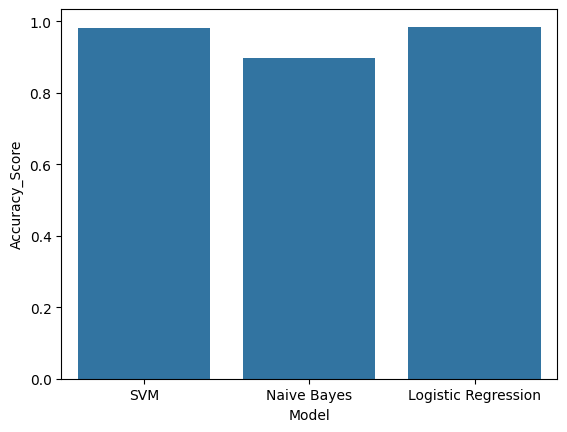

In [ ]:
#Barplot of accuracies
sns.barplot(x="Model", y="Accuracy_Score", data=model_results)